In [10]:
from CQS.methods import Hamiltonian, Cartan, FindParameters
import numpy as np
from CQS.util.verification import exactU, Nident, PauliExpUnitary, KHK


In [11]:
ham = Hamiltonian(5, [(1, 'heisenberg', False)])
cartan = Cartan(ham, involution='countY')
#print(cartan.m)
print(cartan.k)
params = FindParameters(cartan, optimizerMethod='Lax', dt=0.1, truncateExp=15)
params2 = FindParameters(cartan)

[(1, 3, 2, 0, 0), (1, 2, 3, 0, 0), (2, 3, 1, 0, 0), (2, 1, 3, 0, 0), (3, 2, 1, 0, 0), (3, 1, 2, 0, 0), (0, 1, 3, 2, 0), (0, 1, 2, 3, 0), (0, 2, 3, 1, 0), (0, 2, 1, 3, 0), (0, 3, 2, 1, 0), (0, 3, 1, 2, 0), (0, 0, 1, 3, 2), (0, 0, 1, 2, 3), (0, 0, 2, 3, 1), (0, 0, 2, 1, 3), (0, 0, 3, 2, 1), (0, 0, 3, 1, 2), (1, 2, 0, 3, 0), (1, 0, 3, 2, 0), (1, 3, 3, 3, 2), (1, 3, 3, 2, 3), (1, 3, 1, 2, 1), (1, 3, 1, 1, 2), (1, 3, 0, 2, 0), (1, 0, 2, 3, 0), (1, 2, 2, 3, 2), (1, 2, 2, 2, 3), (1, 2, 1, 3, 1), (1, 2, 1, 1, 3), (2, 1, 0, 3, 0), (2, 0, 3, 1, 0), (2, 3, 3, 3, 1), (2, 3, 3, 1, 3), (2, 3, 2, 2, 1), (2, 3, 2, 1, 2), (2, 0, 1, 3, 0), (2, 3, 0, 1, 0), (2, 1, 2, 3, 2), (2, 1, 2, 2, 3), (2, 1, 1, 3, 1), (2, 1, 1, 1, 3), (3, 0, 2, 1, 0), (3, 1, 0, 2, 0), (3, 2, 3, 3, 1), (3, 2, 3, 1, 3), (3, 2, 2, 2, 1), (3, 2, 2, 1, 2), (3, 0, 1, 2, 0), (3, 2, 0, 1, 0), (3, 1, 3, 3, 2), (3, 1, 3, 2, 3), (3, 1, 1, 2, 1), (3, 1, 1, 1, 2), (0, 1, 2, 0, 3), (0, 1, 0, 3, 2), (0, 1, 3, 0, 2), (0, 1, 0, 2, 3), (0, 2, 1, 0, 

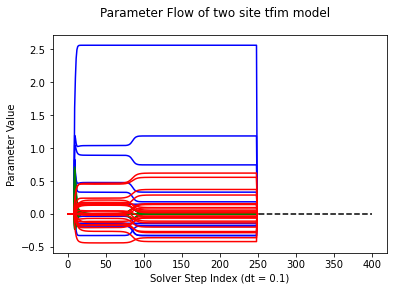

In [ ]:
import matplotlib.pyplot as plt
flow = params.flow
import matplotlib.pyplot as plt

cutoff = 400#flow.shape[1]
for i in range(params.lenm + params.lenK):
    if i < params.lenh:
        plt.plot(flow[i][:cutoff], label=r'$h_{}$'.format(i), color='b')
    elif i < params.lenm:
        plt.plot(flow[i][:cutoff], label=r'$\tilde{{m}}_{}$'.format(i-params.lenh), color='g') 
    else:
        plt.plot(flow[i][:cutoff], label=r'$k_{}$'.format(i- params.lenm), color='r')
plt.suptitle('Parameter Flow of two site tfim model')
plt.xlabel('Solver Step Index (dt = 0.1)')
plt.ylabel('Parameter Value')
plt.hlines(0, 0, cutoff, linestyles='dashed', color='k')
#plt.legend()

In [ ]:
"""#print(params.kappa)
#print(params.comm_table[1])
print(params.hCoefs)
#print(params2.hCoefs)

print('======k========')
print(params.kCoefs)
#print(params2.kCoefs)

print(params.adkMapk)
print(params.adkk)

print(params.kappa)
print(params.cartan.k)
"""

"#print(params.kappa)\n#print(params.comm_table[1])\nprint(params.hCoefs)\n#print(params2.hCoefs)\n\nprint('======k========')\nprint(params.kCoefs)\n#print(params2.kCoefs)\n\nprint(params.adkMapk)\nprint(params.adkk)\n\nprint(params.kappa)\nprint(params.cartan.k)\n"

In [ ]:
U = exactU(ham.HCoefs, ham.HTuples, 1)

In [ ]:
import numpy as np
from numpy import kron
from scipy.linalg import expm, norm

import CQS.util.IO as IO


def KHKtypeI(kCoefs, hCoefs, k, h):
    N = len(h[0])
    Matrix = Nident(N)

    #First loop of K terms:
    K = expm(-1j*PauliSum(kCoefs, k))
    np.matmul(K, Matrix, out=Matrix)

    #H terms
    H = expm(1j*PauliSum(hCoefs, h))
    np.matmul(H, Matrix, out=Matrix)

    K = expm(1j*PauliSum(kCoefs, k))
    np.matmul(K, Matrix, out=Matrix)
    return Matrix


def PauliSum(coefficients, tuples):
    H = np.zeros((2**len(tuples[0]),)*2, dtype=np.complex128)

    for (co, term) in zip(coefficients, tuples):
        H += IO.tuplesToMatrix(co, term)
    return H


In [ ]:
#KHK = KHKtypeI(params.kCoefs, params.hCoefs,
#params.cartan.k, params.cartan.h)
KHKval = KHKtypeI(params.kCoefs, params.hCoefs,
                  params.cartan.k, params.cartan.h)
KHKvalComm = KHK(params.kCoefs, params.hCoefs,
                  params.cartan.k, params.cartan.h)
KHKval2 = KHK(params2.kCoefs, params2.hCoefs, params2.cartan.k, params2.cartan.h)
print(np.linalg.norm(KHKval - KHKval2))# < 1e-5


9.39921197377331e-05


In [ ]:
print(np.linalg.norm(KHKval - U))
#print(np.linalg.norm(KHKvalComm - U))

4.4853638350768526e-07


0.0008833040931808371

1.8896911218275023e-07

4.254253897967273e-09



In [ ]:
from numpy

SyntaxError: invalid syntax (Temp/ipykernel_4040/1853520162.py, line 1)